The question at hand is: Can a machine identify a bee as a honey bee or a bumble bee?  
This notebook walks through loading and processing images. After loading and processing these images, they will be ready for building models that can automatically detect honeybees and bumblebees.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**PIL (Python Imaging Library)** is the Python Imaging Library which provides the python interpreter with image editing capabilities.

The **Beta distribution** is a special case of the Dirichlet distribution, and is related to the Gamma distribution. It is often seen in Bayesian inference and order statistics. The beta distribution also has two characteristic values, usually called alpha and beta, or more succinctly, just a and b. Each set of (a,b) pairs determine a different beta distribution. When you sample from beta(a,b) each sample value will be between 0.0 and 1.0 and if you sample many values they will average to a / (a+b). 

**np.random.beta(a, b, size):** size is out shape. If size=(m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if a and b are both scalars. 

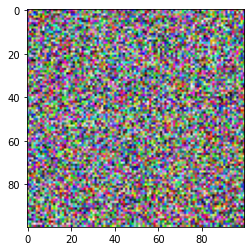

In [2]:
# import Image from PIL so we can use it later
from PIL import Image

# generate test_data
test_data = np.random.beta(1, 1, size=(100, 100, 3))  # 3 colors

# display the test_data
plt.imshow(test_data)
plt.show()

Opening images with PIL

It works with many different image formats, for example, png, jpg, .gif and more.

The image size is: (590, 443)


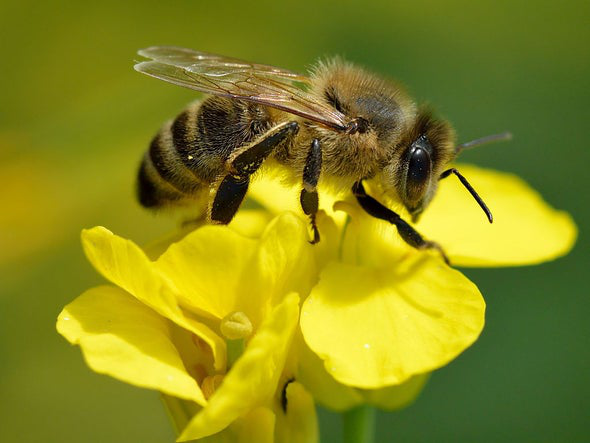

In [3]:
# open the image
image = Image.open('bee1.jpg')

# get the image size
image_size = image.size

print("The image size is: {}".format(image_size))

display(image)

**Image manipulation with PIL**

Pillow has a number of common image manipulation tasks built into the library. For example, one may want to resize an image so that the file size is smaller. Or, perhaps, convert an image to black-and-white instead of color. Operations that Pillow provides include:
<li>resizing</li>
<li>cropping</li>
<li>rotating</li>
<li>flipping</li>
<li>converting to greyscale (or other <a href="https://pillow.readthedocs.io/en/5.1.x/handbook/concepts.html#concept-modes">color modes</a>)</li>

(200, 200)


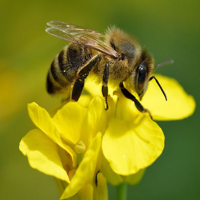

In [4]:
img = image.resize((200, 200))
print(img.size)
img

Image.crop(left, top, right, bottom): (x,y)=(left, top) and (x,y)=(right, bottom)

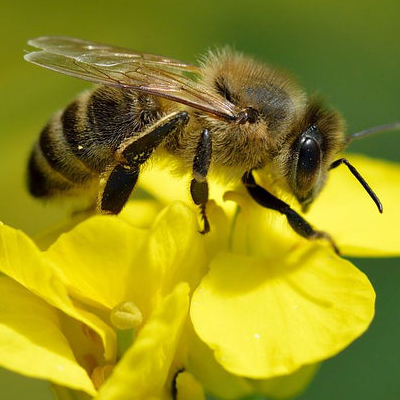

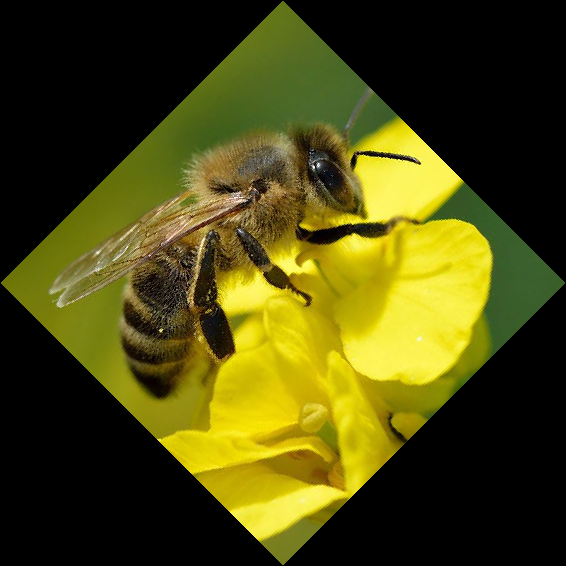

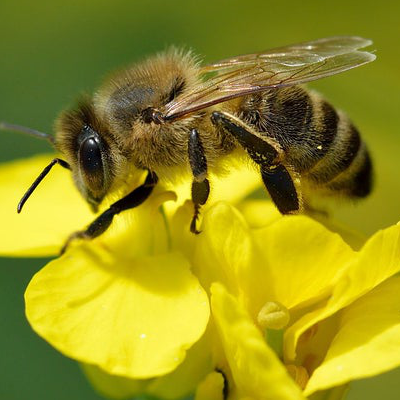

In [5]:
# crop the image
img_cropped = image.crop([110, 10, 510, 410])
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img_cropped.rotate(45, expand=25)
display(img_rotated)

# flip the image left to right
img_flipped = img_cropped.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

**Images as arrays of data**

Most image formats have three color <a href="https://en.wikipedia.org/wiki/RGB_color_model">"channels": red, green, and blue</a> (some images also have a fourth channel called "alpha" that controls transparency). For each pixel in an image, there is a value for every channel.  
<img src="https://assets.datacamp.com/production/project_374/img/AdditiveColor.png" alt="RGB Colors">  
The way this is represented as data is as a three-dimensional matrix. The width of the matrix is the width of the image, the height of the matrix is the height of the image, and the depth of the matrix is the number of channels. So, the height and width of image resized are both 200 pixels. This means that the underlying data is a matrix with the dimensions 200x200x3.

The NumPy array has the shape: (200, 200, 3)


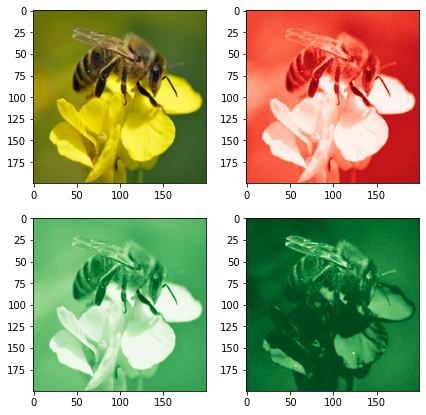

In [6]:
# turn the image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
print("The NumPy array has the shape: {}".format(img_data.shape))

fig, axes = plt.subplots(2, 2, figsize=[7,7])
# plot the data with `imshow` 
axes[0,0].imshow(img_data)
# plot the red channel
axes[0,1].imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
# plot the green channel
axes[1,0].imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
# plot the blue channel
axes[1,1].imshow(img_data[:, :, 2], cmap=plt.cm.Greens_r)
plt.show()

**Explore the color channels**

Color channels can help provide more information about an image. Use kernel density estimate (KDE) for each of the color channels on the same plot so that we can understand how they differ.  
When we make this plot, we'll see that a shape that appears further to the right means more of that color, whereas further to the left means less of that color.</p>

In [7]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over indices and colors
    for ind, color in enumerate(channels):
        plot_kde(image_data[:, :, ind], color)
    plt.show()

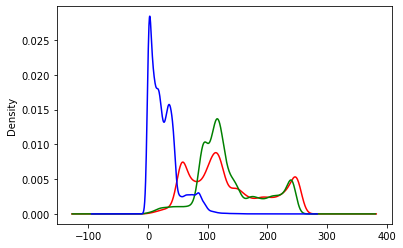

In [8]:
plot_rgb(img_data)

Honey bees

(259, 195)


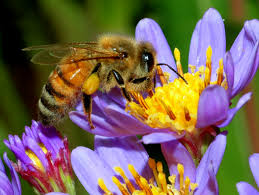

In [9]:
honey1 = Image.open('honey1.jpg')
print(honey1.size)
display(honey1)

(220, 195)


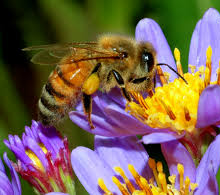

In [10]:
hon_cropped = honey1.crop([0, 0, 220, 195])
print(hon_cropped.size)
hon_cropped

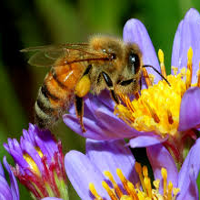

In [11]:
honey = hon_cropped.resize((200, 200))
honey

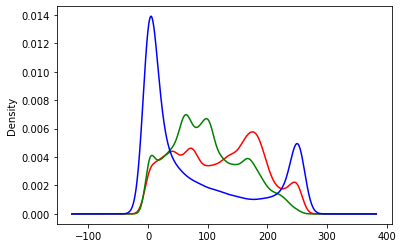

In [12]:
honey_data = np.array(honey)

# plot the rgb densities for the honey bee image
plot_rgb(honey_data)

Bumble bees

(243, 207)


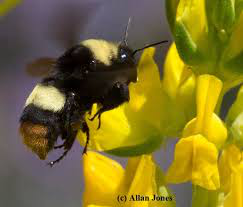

In [13]:
bumble1 = Image.open('bumble1.jpg')
print(bumble1.size)
display(bumble1)

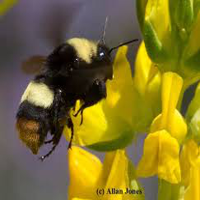

In [14]:
bumble = bumble1.resize((200, 200))
bumble

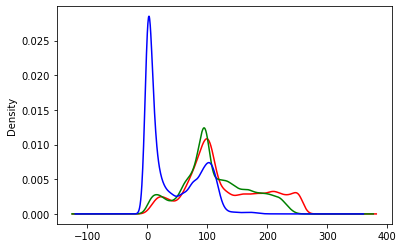

In [15]:
bumble_data = np.array(bumble)

# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)

While sometimes color information is useful, other times it can be distracting. In this examples where we are looking at bees, the bees themselves are very similar colors. On the other hand, the bees are often on top of different color flowers. We know that the colors of the flowers may be distracting from separating honey bees from bumble bees, so let's convert these images to black-and-white, or grayscale.  
Switching between modes is done with the .convert() method, which is passed a string for the new mode.
Because we change the number of color "channels," the shape of our array changes with this change. It also will be interesting to look at how the KDE of the grayscale version compares to the RGB version above.

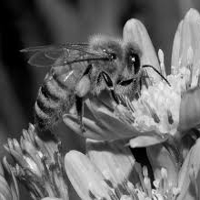

The NumPy array has the shape: (200, 200)


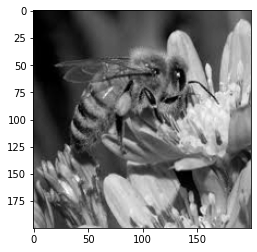

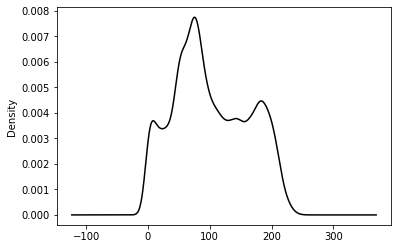

In [16]:
# convert honey to grayscale
honey_bw = honey.convert('L')
display(honey_bw)

honey_bw_arr = np.array(honey_bw)

print("The NumPy array has the shape: {}".format(honey_bw_arr.shape))

plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

plot_kde(honey_bw_arr, 'k')

**Save the images!**

Using the np.maximum function, we can take any number in the array smaller than 100 and replace it with 100. Because this reduces the range of values, it will increase the contrast of the image. We'll then convert that back to an Image and save the result.

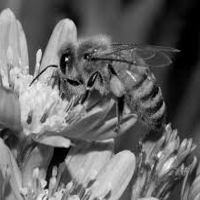

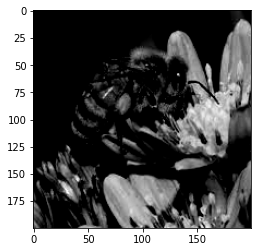

In [17]:
# flip the image left-right with transpose
honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save("honey_bw_flipped.jpg")

# create higher contrast by reducing range
honey_hc_arr = np.maximum(honey_bw_arr, 100)

# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version
honey_bw_hc.save("honey_bw_hc.jpg")

**Make a pipeline**

Create an image processing pipeline. We have all the tools in our toolbox to load images, transform them, and save the results:
<li>Load the image with Image.open and create paths to save our images to</li>
<li>Convert the image to grayscale</li>
<li>Save the grayscale image</li>
<li>Rotate, crop, and zoom in on the image and save the new image</li>

In [18]:
# Used to change filepaths
from pathlib import Path

image_paths = ['honey1.jpg', 'bumble1.jpg']

def process_image(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = "bw_{}.jpg".format(path.stem)
    rcz_path = "rcz_{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert('L')
    bw.save(bw_path)

    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = img.rotate(45).crop([25, 25, 75, 75]).resize(size=(100, 100))
    rcz.save(rcz_path)

# for loop over image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of honey1.jpg and saving to bw_honey1.jpg.
Creating rotated, cropped, and zoomed version of honey1.jpg and saving to rcz_honey1.jpg.
Creating grayscale version of bumble1.jpg and saving to bw_bumble1.jpg.
Creating rotated, cropped, and zoomed version of bumble1.jpg and saving to rcz_bumble1.jpg.
